In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [31]:
df = pd.read_csv('train.csv')
df
df.shape

(891, 12)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [33]:
df_null = df.isnull()
df_null.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


In [34]:
df_null.sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

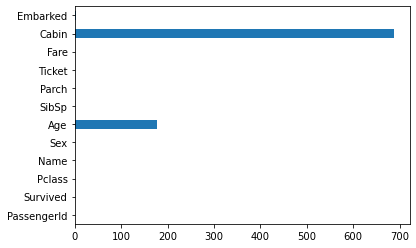

In [51]:
df_null.sum().plot.barh()

In [52]:
df_null.mean()*100 # 데이터 결측치 퍼센트

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

<AxesSubplot:>

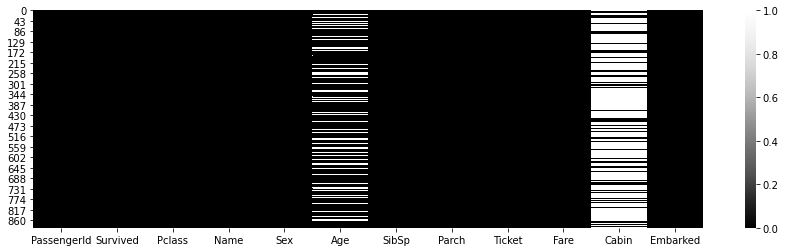

In [53]:
plt.figure(figsize=(15,4))
sns.heatmap(df_null, cmap='Greys_r')

In [36]:
df.describe(include='number')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [90]:
df=df.dropna()

In [105]:
a = df['Survived']

Text(0.5, 1.0, 'Survived')

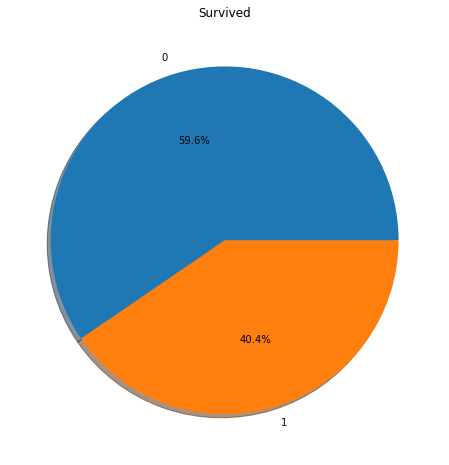

In [106]:
s = a.value_counts()
plt.figure(figsize=(15,8))
plt.pie(s,labels=s.index, autopct='%.1f%%', shadow=True)
plt.title('Survived')

<AxesSubplot:xlabel='Survived', ylabel='count'>

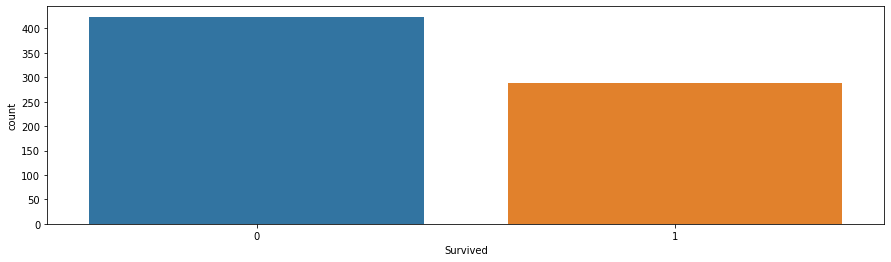

In [107]:
plt.figure(figsize=(15,4))
sns.countplot(data=df, x='Survived')

<AxesSubplot:xlabel='Survived', ylabel='Age'>

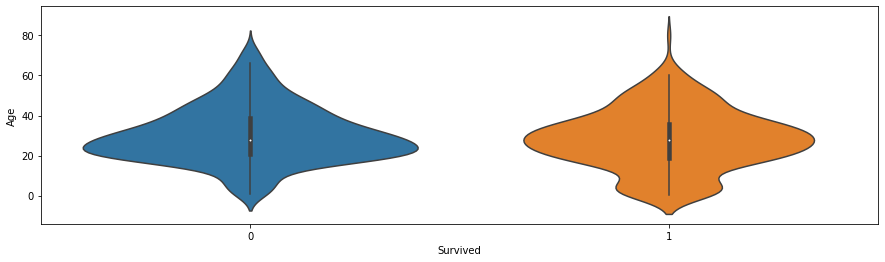

In [108]:
plt.figure(figsize=(15,4))
sns.violinplot(data=df, x='Survived', y='Age')

<Figure size 1080x288 with 0 Axes>

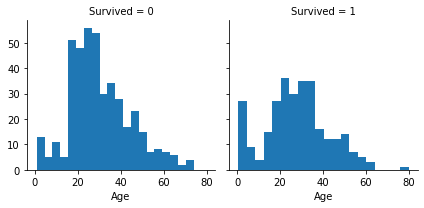

In [109]:
plt.figure(figsize=(15,4))
g = sns.FacetGrid(df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

<Figure size 1080x288 with 0 Axes>

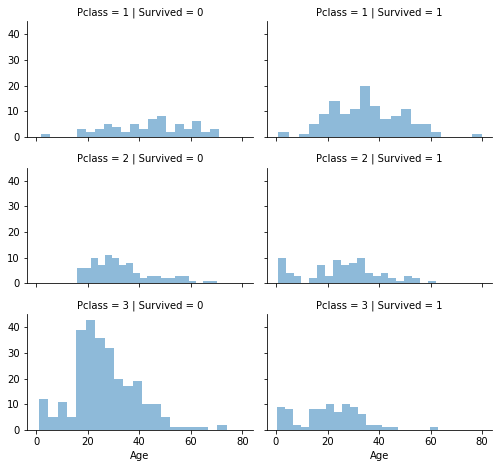

In [49]:
plt.figure(figsize=(15,4))
grid = sns.FacetGrid(df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)

In [145]:
cut_data = pd.cut(df.Age,  bins=[0,10,20,30,40,50,60,70,80])
df['AgeLabel'] = cut_data

C:\Users\Owner\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [146]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeLabel
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,"(20, 30]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,"(30, 40]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,"(20, 30]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,"(30, 40]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,"(30, 40]"


In [147]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeLabel
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.125,Q,"(30, 40]"
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,S,"(20, 30]"
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.000,S,"(10, 20]"
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.000,C,"(20, 30]"
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.750,Q,"(30, 40]"


In [148]:
age = df.groupby('AgeLabel')

In [149]:
age.sum()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
AgeLabel,,,,,,,
"(0, 10]",27574,38,169,273.17,118,91,1947.8041
"(10, 20]",51481,44,291,1991.50,68,45,3395.8961
"(20, 30]",98597,84,549,5847.50,74,55,6510.5453
"(30, 40]",72585,68,323,5395.00,58,61,6506.8955
"(40, 50]",41581,33,165,3902.00,32,37,3540.0336
"(50, 60]",18892,17,64,2305.50,13,13,1880.5417
"(60, 70]",6495,3,25,1024.00,3,6,700.4833
"(70, 80]",2191,1,9,366.50,0,0,129.6834


In [150]:
age.count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
AgeLabel,,,,,,,,,,,
"(0, 10]",64,64,64,64,64,64,64,64,64,64,64
"(10, 20]",115,115,115,115,115,115,115,115,115,115,115
"(20, 30]",230,230,230,230,230,230,230,230,230,230,230
"(30, 40]",154,154,154,154,154,154,154,154,154,154,154
"(40, 50]",86,86,86,86,86,86,86,86,86,86,86
"(50, 60]",42,42,42,42,42,42,42,42,42,42,42
"(60, 70]",16,16,16,16,16,16,16,16,16,16,16
"(70, 80]",5,5,5,5,5,5,5,5,5,5,5


<AxesSubplot:xlabel='AgeLabel', ylabel='count'>

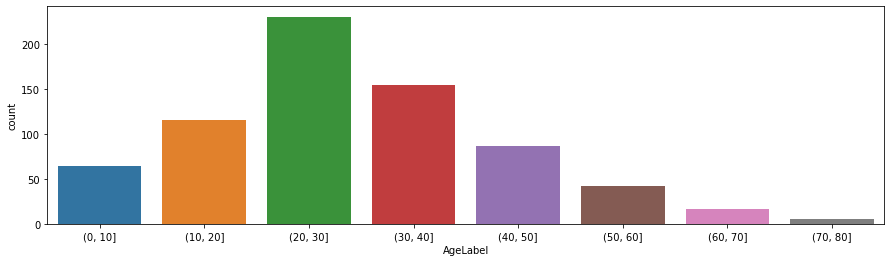

In [151]:
plt.figure(figsize=(15,4))
sns.countplot(data=df, x='AgeLabel')

In [158]:
age_list= df.groupby(['AgeLabel'])['Survived'].agg(['mean','count']).reset_index()
age_list

,AgeLabel,mean,count
0,"(0, 10]",0.593750,64
1,"(10, 20]",0.382609,115
2,"(20, 30]",0.365217,230
3,"(30, 40]",0.441558,154
4,"(40, 50]",0.383721,86
5,"(50, 60]",0.404762,42
6,"(60, 70]",0.187500,16
7,"(70, 80]",0.200000,5


In [153]:
df[['AgeLabel', 'Survived']].groupby(['AgeLabel'], as_index=False).count().sort_values(by='AgeLabel', ascending=True)

,AgeLabel,Survived
0,"(0, 10]",64
1,"(10, 20]",115
2,"(20, 30]",230
3,"(30, 40]",154
4,"(40, 50]",86
5,"(50, 60]",42
6,"(60, 70]",16
7,"(70, 80]",5


<AxesSubplot:xlabel='AgeLabel', ylabel='count'>

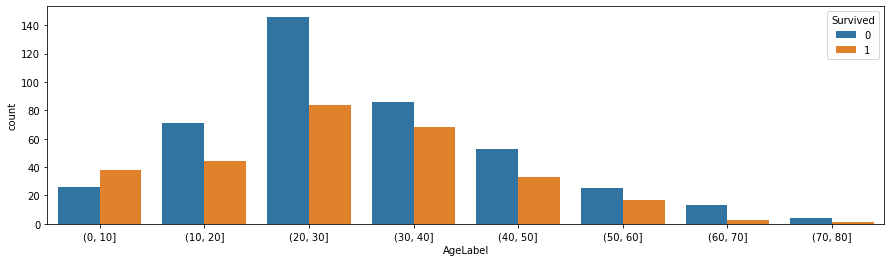

In [154]:
plt.figure(figsize=(15,4))
sns.countplot(data=df, x='AgeLabel', hue='Survived')

In [155]:
table = pd.pivot_table(df, index = ['AgeLabel','Survived'],aggfunc={'Survived':np.sum})
table

Survived
AgeLabel Survived          
(0, 10]  0                0
         1               38
(10, 20] 0                0
         1               44
(20, 30] 0                0
         1               84
(30, 40] 0                0
         1               68
(40, 50] 0                0
         1               33
(50, 60] 0                0
         1               17
(60, 70] 0                0
         1                3
(70, 80] 0                0
         1                1

In [156]:
table1 = pd.pivot_table(df, index = ['AgeLabel','Survived'],aggfunc={'Survived':lambda x: len(x)})
table1

Survived
AgeLabel Survived          
(0, 10]  0               26
         1               38
(10, 20] 0               71
         1               44
(20, 30] 0              146
         1               84
(30, 40] 0               86
         1               68
(40, 50] 0               53
         1               33
(50, 60] 0               25
         1               17
(60, 70] 0               13
         1                3
(70, 80] 0                4
         1                1

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

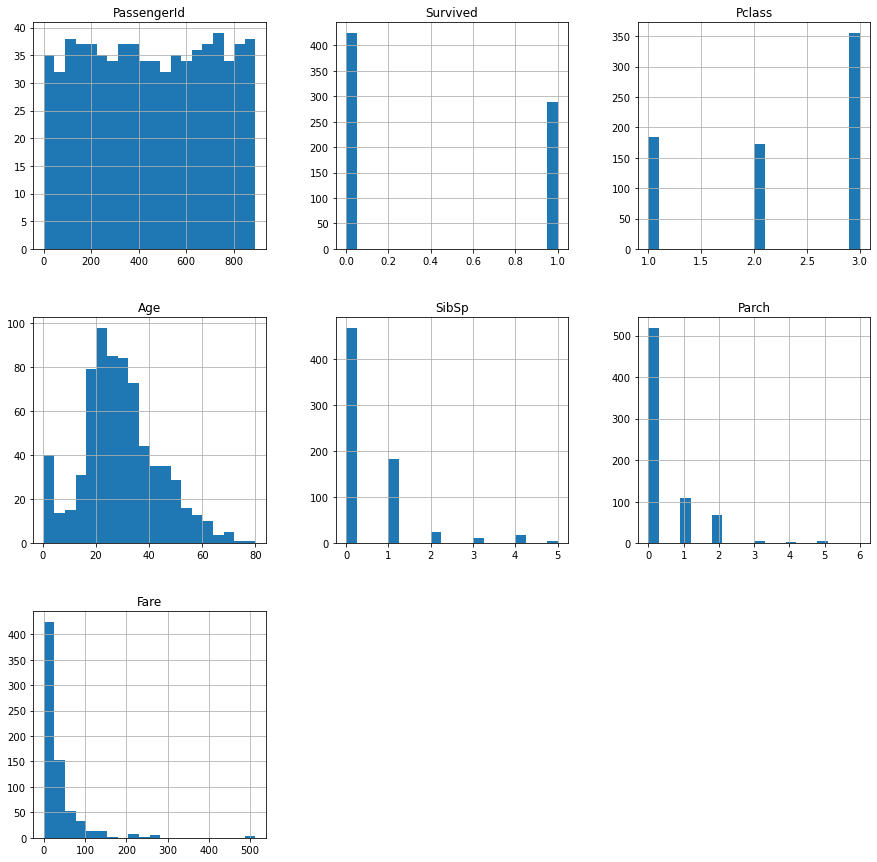

In [138]:
df.hist(figsize=(15,15), bins=20)

In [141]:
df_corr=df.corr()
df_corr.style.background_gradient()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.029526,-0.035609,0.033681,-0.082704,-0.011672,0.009655
Survived,0.029526,1.000000,-0.356462,-0.082446,-0.015523,0.095265,0.266100
Pclass,-0.035609,-0.356462,1.000000,-0.365902,0.065187,0.023666,-0.552893
Age,0.033681,-0.082446,-0.365902,1.000000,-0.307351,-0.187896,0.093143
SibSp,-0.082704,-0.015523,0.065187,-0.307351,1.000000,0.383338,0.139860
Parch,-0.011672,0.095265,0.023666,-0.187896,0.383338,1.000000,0.206624
Fare,0.009655,0.266100,-0.552893,0.093143,0.139860,0.206624,1.000000
